**Nama dan Nim Anggota Kelompok :**
1. Andi Aswad (202110370311029)
2. Gusnaba Fata Kusuma (202110370311037)
3. Umi Nursyafika (202110370311334)

In [6]:
# Import library yang diperlukan
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
# https://drive.google.com/file/d/176kp0hf4agKgq3AcXj1G-Msj1NM_RSGs/view?usp=sharing
url = "https://drive.google.com/uc?id=176kp0hf4agKgq3AcXj1G-Msj1NM_RSGs"
output = "spotify_songs.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=176kp0hf4agKgq3AcXj1G-Msj1NM_RSGs
To: e:\KULIAH\MY DOCS\SEMESTER 7\Big Data\Proyek-Akhir\spotify_songs.csv
100%|██████████| 7.97M/7.97M [00:04<00:00, 1.77MB/s]


'spotify_songs.csv'

In [8]:
spotify = pd.read_csv(output)

spotify

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [9]:
# Menampilkan informasi awal tentang data
# Fungsi: Melihat struktur dataset, tipe data, dan jumlah nilai null
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [10]:
# Data Cleaning
# Menghapus kolom yang tidak relevan untuk analisis emosi
columns_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name',
                   'playlist_id', 'playlist_name', 'playlist_genre', 'playlist_subgenre']
spotify_cleaned = spotify.drop(columns=columns_to_drop)

In [11]:
# Menangani nilai null
# Fungsi: Menghapus baris yang memiliki nilai null agar analisis tidak terganggu
spotify_cleaned = spotify_cleaned.dropna()

In [12]:
# Menambahkan kolom tahun rilis
# Fungsi: Menambahkan informasi tahun untuk analisis tren berdasarkan waktu

# Konversi kolom ke format datetime dengan format yang fleksibel
spotify_cleaned['release_year'] = pd.to_datetime(
    spotify_cleaned['track_album_release_date'], format='mixed', errors='coerce'
).dt.year

# Drop kolom 'track_album_release_date' setelah ekstraksi
spotify_cleaned = spotify_cleaned.drop(columns=['track_album_release_date'])

# Tampilkan beberapa baris untuk memastikan proses berhasil
spotify_cleaned.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019


In [13]:
# Menampilkan statistik deskriptif dari data yang telah dibersihkan
# Fungsi: Memahami distribusi nilai dari setiap variabel numerik
spotify_cleaned.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622,2011.137270
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182,11.417451
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000,2008.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,2016.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000,2019.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000


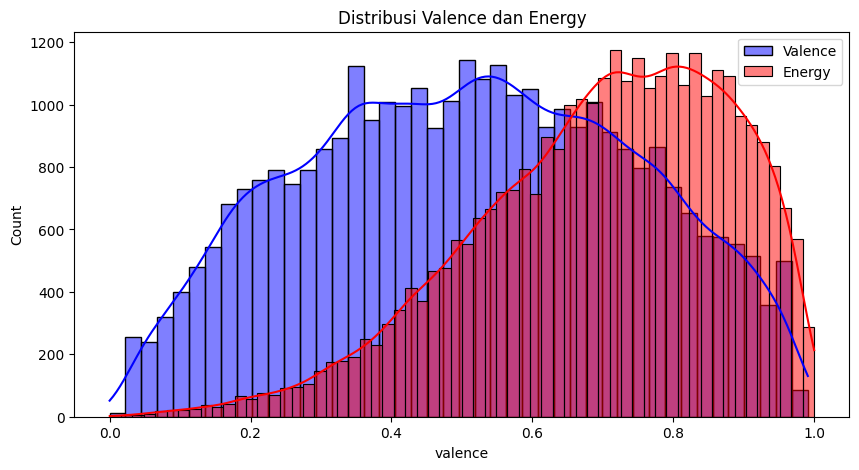

In [14]:
# Visualisasi distribusi valence dan energy
# Fungsi: Melihat distribusi variabel utama yang memengaruhi emosi
plt.figure(figsize=(10, 5))
sns.histplot(spotify_cleaned['valence'], kde=True, color='blue', label='Valence')
sns.histplot(spotify_cleaned['energy'], kde=True, color='red', label='Energy')
plt.title('Distribusi Valence dan Energy')
plt.legend()
plt.show()


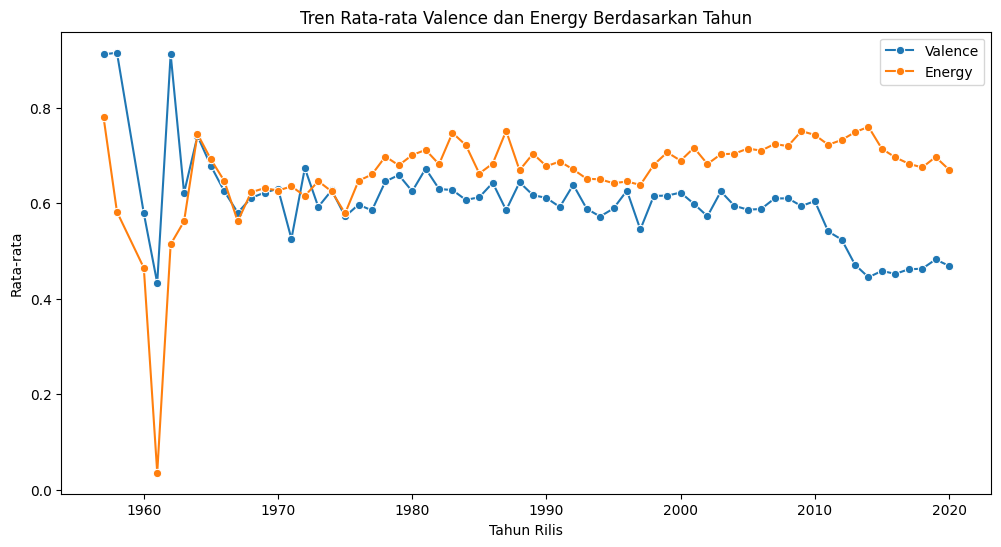

In [15]:
# Analisis rata-rata valence dan energy berdasarkan tahun rilis
# Fungsi: Memahami perubahan rata-rata valence dan energy seiring waktu
avg_valence_energy = spotify_cleaned.groupby('release_year')[['valence', 'energy']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_valence_energy, x='release_year', y='valence', label='Valence', marker='o')
sns.lineplot(data=avg_valence_energy, x='release_year', y='energy', label='Energy', marker='o')
plt.title('Tren Rata-rata Valence dan Energy Berdasarkan Tahun')
plt.ylabel('Rata-rata')
plt.xlabel('Tahun Rilis')
plt.legend()
plt.show()

In [16]:
# Clustering dengan K-Means
# Fungsi: Mengelompokkan lagu berdasarkan valence dan energy untuk menemukan pola emosional
scaler = StandardScaler()
data_scaled = scaler.fit_transform(spotify_cleaned[['valence', 'energy']])

In [17]:
# Menentukan jumlah cluster optimal (dalam kasus ini, kita pilih 3 sebagai contoh)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
spotify_cleaned['cluster'] = kmeans.fit_predict(data_scaled)

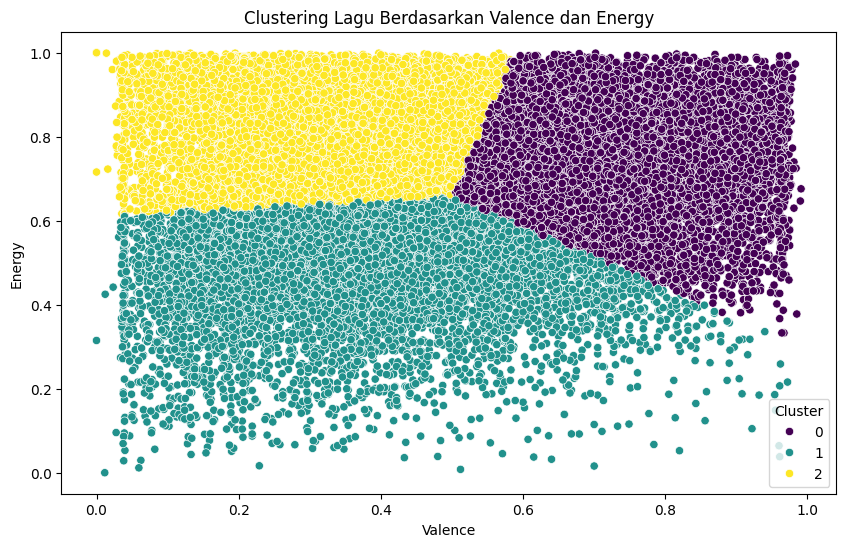

In [18]:
# Visualisasi hasil clustering
# Fungsi: Menampilkan cluster lagu berdasarkan valence dan energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_cleaned, x='valence', y='energy', hue='cluster', palette='viridis')
plt.title('Clustering Lagu Berdasarkan Valence dan Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend(title='Cluster')
plt.show()

In [19]:
# Menampilkan jumlah lagu di setiap cluster
# Fungsi: Memahami distribusi lagu di setiap cluster
cluster_counts = spotify_cleaned['cluster'].value_counts()
print("Jumlah lagu di setiap cluster:")
print(cluster_counts)

Jumlah lagu di setiap cluster:
cluster
0    13333
2    10546
1     8954
Name: count, dtype: int64


In [20]:
spotify_cleaned = spotify[['playlist_genre', 'valence', 'energy', 'danceability', 'track_album_release_date']]
spotify_cleaned.head()

,playlist_genre,valence,energy,danceability,track_album_release_date
0,pop,0.518,0.916,0.748,2019-06-14
1,pop,0.693,0.815,0.726,2019-12-13
2,pop,0.613,0.931,0.675,2019-07-05
3,pop,0.277,0.930,0.718,2019-07-19
4,pop,0.725,0.833,0.650,2019-03-05


Text(0.5, 1.0, 'Distribusi Valence Berdasarkan Genre')

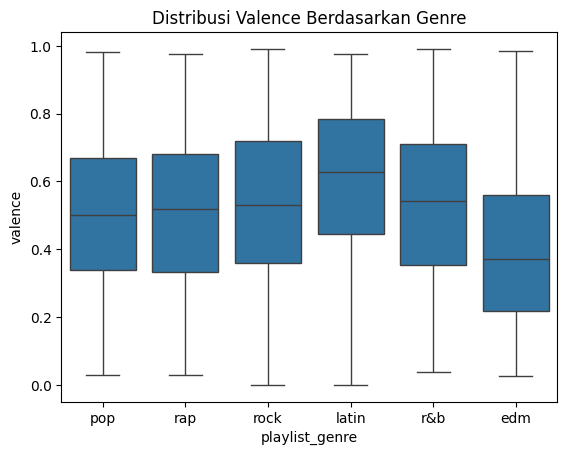

In [21]:
sns.boxplot(data=spotify_cleaned, x='playlist_genre', y='valence')
plt.title('Distribusi Valence Berdasarkan Genre')


In [22]:
summary = spotify_cleaned.groupby('playlist_genre')[['valence', 'energy']].mean().reset_index()
summary


,playlist_genre,valence,energy
0,edm,0.400656,0.802476
1,latin,0.605510,0.708312
2,pop,0.503521,0.701028
3,r&b,0.531231,0.590934
4,rap,0.505090,0.650708
5,rock,0.537352,0.732813
